# Medical Insurance Premium

In [2]:
# Library used
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
%matplotlib inline


In [3]:
df = pd.read_csv("Medicalpremium.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [6]:
# Replacing the numerical value of the columsn to categorical value
df["Diabetes"]=df["Diabetes"].replace({0:"No",1:"Yes"})
df["BloodPressureProblems"]=df["BloodPressureProblems"].replace({0:"No",1:"Yes"})
df["AnyTransplants"]=df["AnyTransplants"].replace({0:"No",1:"Yes"})
df["AnyChronicDiseases"]=df["AnyChronicDiseases"].replace({0:"No",1:"Yes"})
df["KnownAllergies"]=df["KnownAllergies"].replace({0:"No",1:"Yes"})
df["HistoryOfCancerInFamily"]=df["HistoryOfCancerInFamily"].replace({0:"No",1:"Yes"})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      986 non-null    int64 
 1   Diabetes                 986 non-null    object
 2   BloodPressureProblems    986 non-null    object
 3   AnyTransplants           986 non-null    object
 4   AnyChronicDiseases       986 non-null    object
 5   Height                   986 non-null    int64 
 6   Weight                   986 non-null    int64 
 7   KnownAllergies           986 non-null    object
 8   HistoryOfCancerInFamily  986 non-null    object
 9   NumberOfMajorSurgeries   986 non-null    int64 
 10  PremiumPrice             986 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 84.9+ KB


In [8]:
# Filtering the dataframe with required condition
df_knownallergy = df[(df["KnownAllergies"] == "Yes")]
df_AnyChronicDiseases = df[(df["AnyChronicDiseases"] == "Yes")]
df_Diabetes = df[(df["Diabetes"] == "Yes")]
df_BloodPressureProblems = df[(df["BloodPressureProblems"] == "Yes")]

#### Note: The word premium price is interchangebly used as policy rate too.

# Insight

Text(0.5, 1.0, 'Age Wise Distribution')

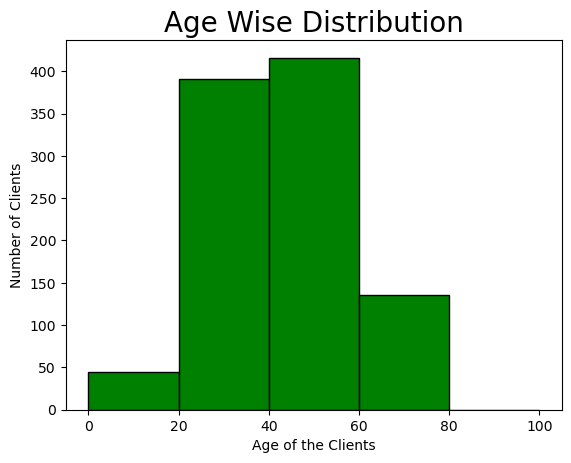

In [9]:
fig, ax=plt.subplots()
ax.hist(df["Age"],bins=[0,20,40,60,80,100],edgecolor ="black",color="green")
ax.set_xlabel("Age of the Clients")
ax.set_ylabel("Number of Clients")
ax.set_title("Age Wise Distribution",fontsize=20)


### Currently, the company has huge number of clients at the age between 40 to 60 and 20 to 40 in descending order. Company have a huge market to tap into clients of age between 0 to 20 and 60 to 80. There could be a chance that the current policy is attractive for the age bracket of 20 to 60 and not for others.
### Probably, they must start new schemes for the rest of the age groups which they failed to cover. Through this measure they can improve their market share for these market segments.


# Insight (Does age and price have any relationship?)

Text(0.5, 1.0, 'Age of Clients over Policy Rate')

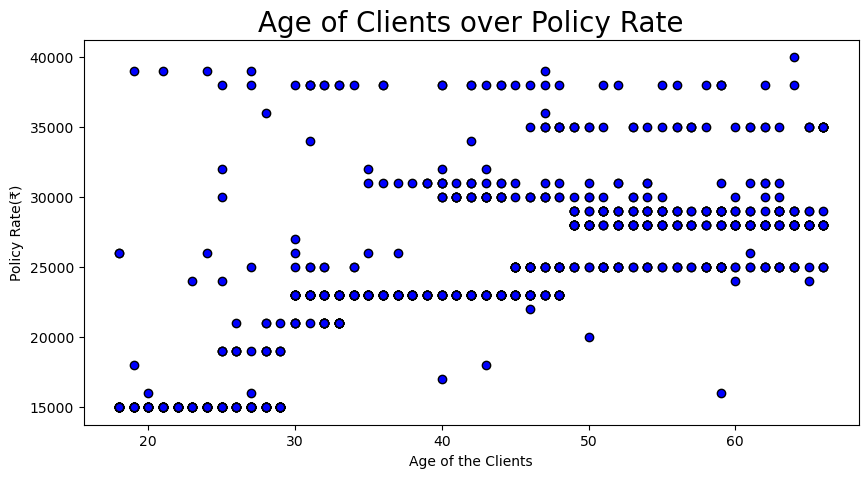

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df["Age"],df["PremiumPrice"],facecolor='blue', edgecolor='black')
ax.set_xlabel("Age of the Clients")
ax.set_ylabel("Policy Rate(₹)")
ax.set_title("Age of Clients over Policy Rate",fontsize=20)


### Through the above visulization we can find that premium charged on the policy does not depend on age factor greatly. The people who is 20 years of age can be found for policy rate of Rs 15,000 as well for for policy rate more than Rs 35,000. So, in conclusion it is not just the age but so many other factors like illness could impact the premium.
### Let us find the primary factors that affects the pricing in upcoming insights.

# Insight

Text(0.5, 1.0, 'Any Chronic Diseases')

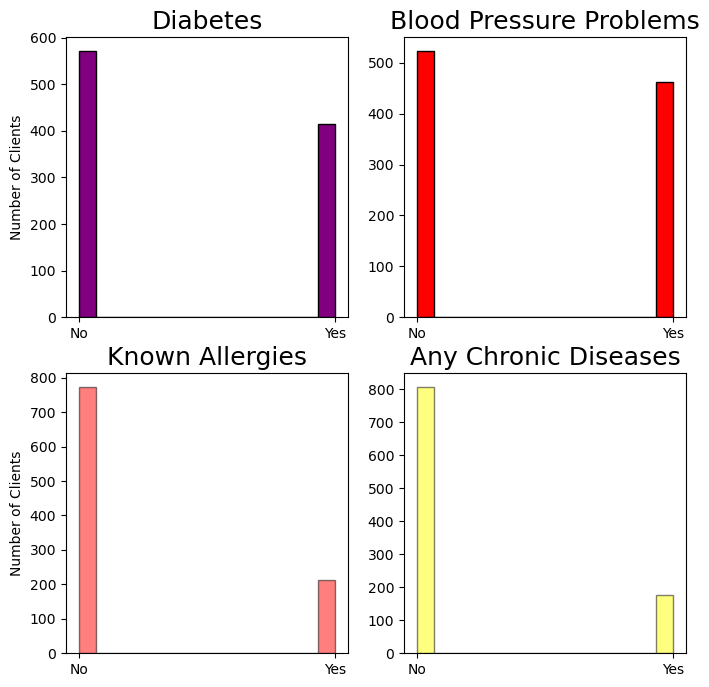

In [11]:
# Bar chart with multiple plot
fig,ax = plt.subplots(2,2,figsize=(8,8))
ax[0,0].hist(df["Diabetes"], bins=15, alpha=1, color="purple",edgecolor="black")
ax[0,0].set_title("Diabetes",fontsize=18)
ax[0,0].set_ylabel("Number of Clients")
ax[0,1].hist(df["BloodPressureProblems"], bins=15, alpha=1, color="red",edgecolor="black")
ax[0,1].set_title("Blood Pressure Problems",fontsize=18)
ax[1,0].hist(df["KnownAllergies"], bins=15, alpha=0.5, color="red",edgecolor="black")
ax[1,0].set_ylabel("Number of Clients")
ax[1,0].set_title("Known Allergies",fontsize=18)
ax[1,1].hist(df["AnyChronicDiseases"], bins=15, alpha=0.5, color="yellow",edgecolor="black")
ax[1,1].set_title("Any Chronic Diseases",fontsize=18)


### Hmmm, surprisingly we have clients mostly from the side of blood pressure problems and diabetes. We are lacking to cover more clients who are affected with certain allergies and chronic diseases. There is a chance that the insurance policy provided by the company does not cover the provide riders that involve known allergies and any chronic disease.  Including these two problems as a rider will attract furthermore clients towards this company.
### There can the an issue of charging higher prices for the problems known allergies and chronic diseases in the insurance policy which lacks demand for it. Are they really charging higher premiums for people with these diseases? Let us see that in further insights!

# Insight

C:\Users\Abinesh T.A\AppData\Local\Temp\ipykernel_16816\3959933707.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(["With Chronic Diseases"])
C:\Users\Abinesh T.A\AppData\Local\Temp\ipykernel_16816\3959933707.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(["With Diabetes"])
C:\Users\Abinesh T.A\AppData\Local\Temp\ipykernel_16816\3959933707.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(["With Blood Pressure Problems"])


Text(0.5, 1.0, 'Blood Pressure Problems Over Price')

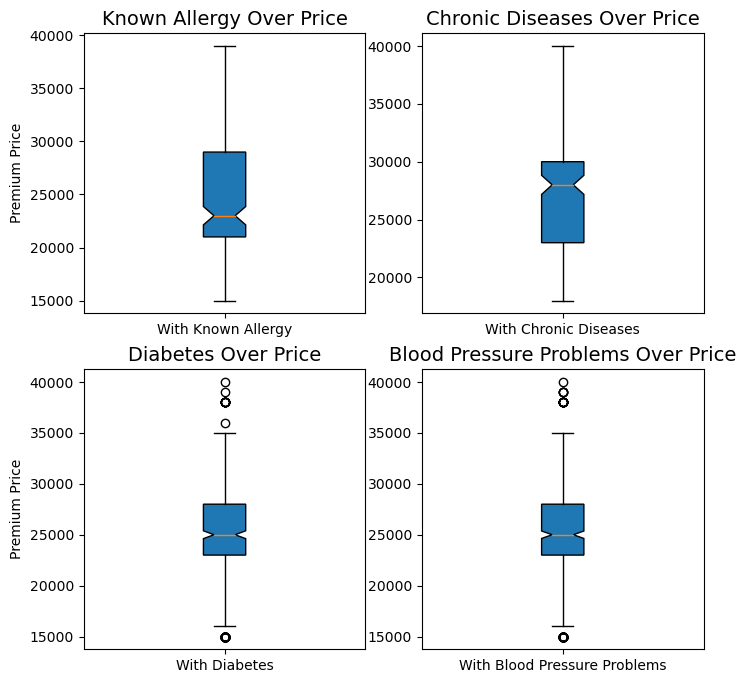

In [12]:
# Bar chart with multiple plot
fig,ax = plt.subplots(2,2,figsize=(8,8))
ax[0,0].boxplot(df_knownallergy["PremiumPrice"], patch_artist = True,notch ='True')
ax[0,0].set_title("Known Allergy Over Price",fontsize=14)
ax[0,0].set_xticklabels(["With Known Allergy"])
ax[0,0].set_ylabel("Premium Price")
ax[0,1].set_xticklabels(["With Chronic Diseases"])
ax[0,1].boxplot(df_AnyChronicDiseases["PremiumPrice"], patch_artist = True,notch ='True')
ax[0,1].set_title("Chronic Diseases Over Price",fontsize=14)
ax[1,0].set_xticklabels(["With Diabetes"])
ax[1,0].boxplot(df_Diabetes["PremiumPrice"], patch_artist = True,notch ='True')
ax[1,0].set_title("Diabetes Over Price",fontsize=14)
ax[1,0].set_ylabel("Premium Price")
ax[1,1].set_xticklabels(["With Blood Pressure Problems"])
ax[1,1].boxplot(df_BloodPressureProblems["PremiumPrice"], patch_artist = True,notch ='True')
ax[1,1].set_title("Blood Pressure Problems Over Price",fontsize=14)

### Surprisingly, the guess we gave in the previous insight as a question is true. The company is charging too high premium price for the policy holders with known allergy and chronic diseases. Policies with diabetes and blood pressure problems are charged very less. Only few people are charged high in the case of diabetes and blood pressure, which is regarded as an outlier.
### If this trend continues we might loose even the current clients who have the illness of chronic and allergy as there is a huge premium charged over them compared to other two. They might switch to the competitor brands who provide the same policies for lesser price. Company must start reducing the policies premium price for these two diseases to attract new customers as well as holding the existing clients too.


# Insight

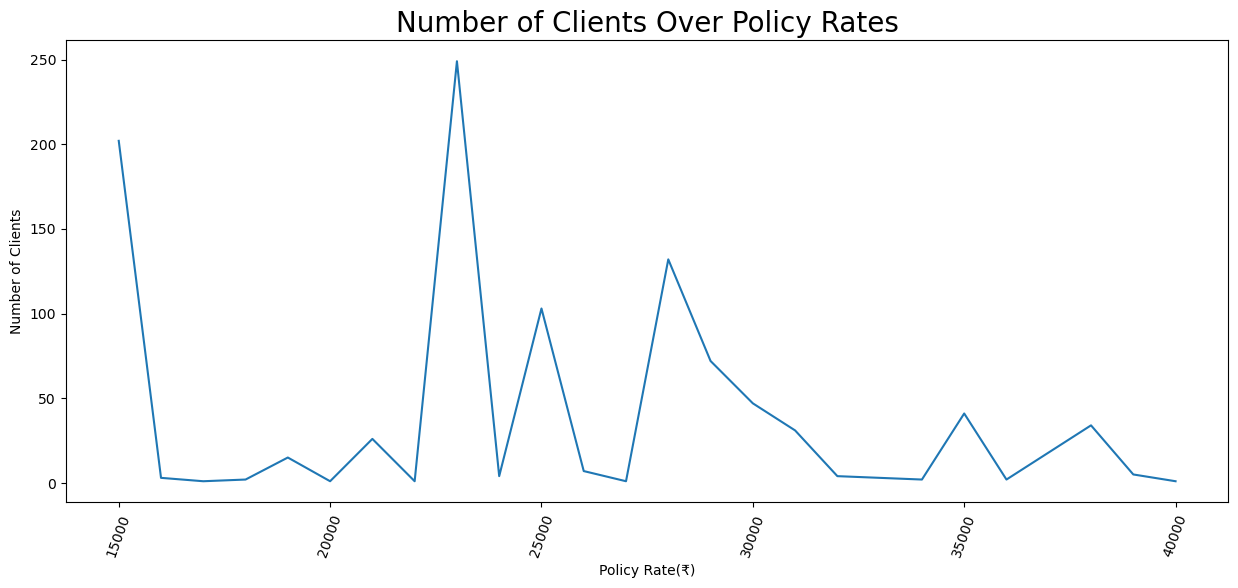

In [13]:
surgeries = df['PremiumPrice'].value_counts().sort_index()
x = list(surgeries.index)
y = list(surgeries.values)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=70)
plt.plot(x,y)
plt.title("Number of Clients Over Policy Rates",fontsize=20)
plt.xlabel('Policy Rate(₹)')
plt.ylabel('Number of Clients')
plt.show()

### There are greater variations in the number of clients who are paying the premiums for policy. Surprisingly, so the people have subscribed the policy rate of Rs.23000. This depicts the companies poor standards of setting policy rate according to the services they offer and more oover some form of partiality for that particular policy. 
### Company must start to revise the services they provide in the particular policy's. The revision must ensure that the the number of clients taking up a premium price does not have a great variation from the other premium prices. Slight variation can be acceptable.

# Insight

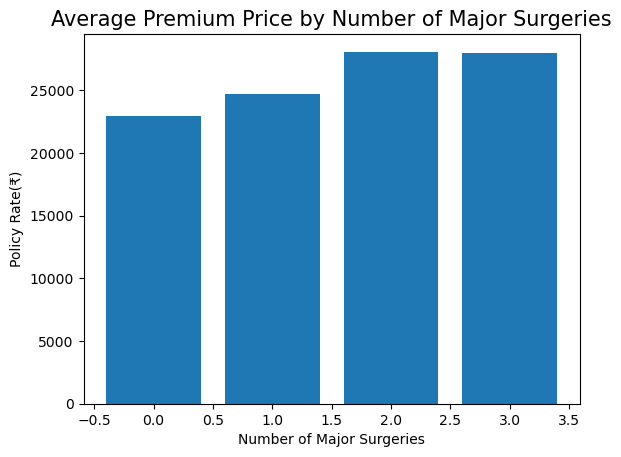

In [14]:
grouped_df = df.groupby("NumberOfMajorSurgeries")[["PremiumPrice"]].mean()
plt.bar(grouped_df.index, grouped_df["PremiumPrice"])
plt.title("Average Premium Price by Number of Major Surgeries",fontsize=15)
plt.xlabel("Number of Major Surgeries")
plt.ylabel("Policy Rate(₹)")
plt.show()

### The pricing method used according to the number of major surgeries is appreciable and can be considered that factor too. As the number of surgeries increase for a client, the policy rate charged on average also increases. However, there is no great difference between 2 and 3 surgeries. A slight increase in the premium price for people with 3 surgeries might act as a good pricing strategy.

# Insight (Do we have more clients with Diabetes)

In [15]:
df_diabet= df["Diabetes"].value_counts(normalize= True)


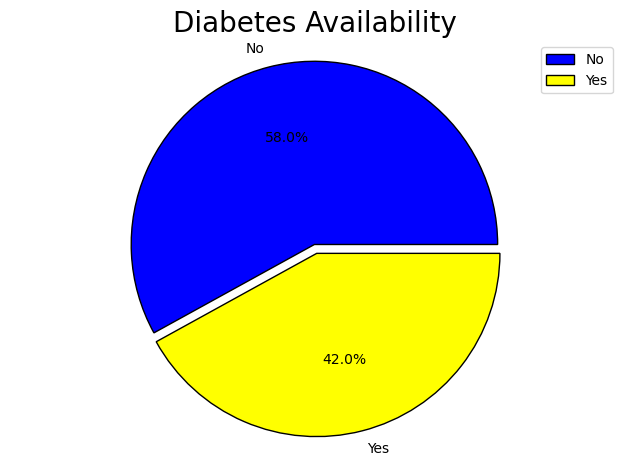

In [16]:
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
plt.pie(df_diabet, 
        labels = ['No','Yes'],
        colors = ['blue', 'yellow'],
        autopct = '%0.1f%%',
        explode = [0, 0.05],
        wedgeprops = wp
      );
plt.title("Diabetes Availability",fontsize=20)
plt.legend(loc = 'upper right')
plt.axis('equal')
plt.tight_layout()

### There are around 42% of clients currently have diabetes. To increase this space of clients with diabetes, there can be riders introduced in the policies for this. Especially providing riders that offers free diabetic consultation and treatments. 